In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.express as px
import plotly.io as pio
import seaborn as sns
pio.renderers.default = 'iframe'

### Monthly Analysis

In [48]:
monthly_analysis_path = 'results/monthly_counts/monthly_counts.csv'

In [49]:
monthly_counts_avg = pd.read_csv(monthly_analysis_path)
print(monthly_counts_avg.head())

   month  accident_count
0      1           64878
1      2           68855
2      3           54025
3      4           72909
4      5           68303


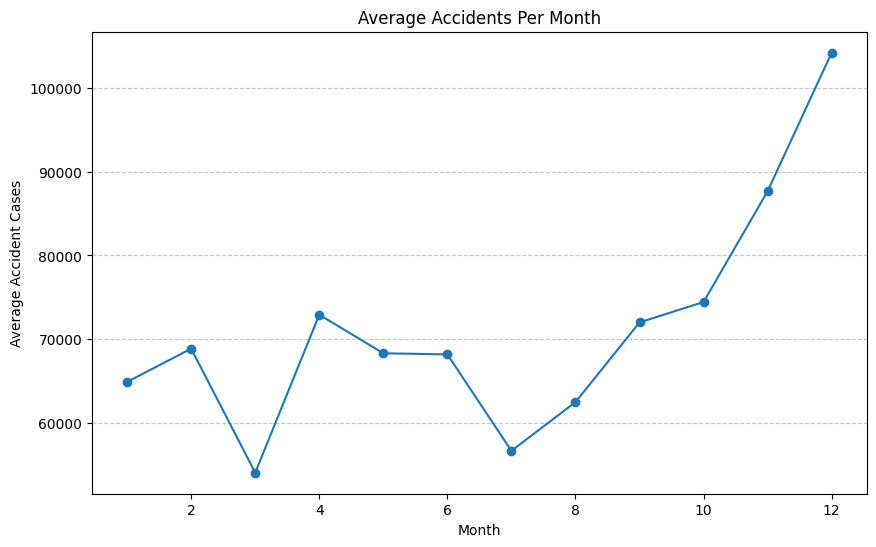

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts_avg['month'], monthly_counts_avg['accident_count'], marker='o', linestyle='-')

plt.title('Average Accidents Per Month')
plt.xlabel('Month')
plt.ylabel('Average Accident Cases')

plt.grid(axis='y', linestyle='--', alpha=0.7)

### Yearly Analysis and Covid Impact

In [51]:
file_path = 'results/yearly_counts/yearly_counts_analysis.csv'
yearly_counts = pd.read_csv(file_path)
print(yearly_counts.head())

   year state  accident_count
0  2017    AL             443
1  2018    AL            2187
2  2019    AL           14657
3  2020    AL           19428
4  2021    AL           22976


In [52]:
yearly_totals = yearly_counts.groupby('year')['accident_count'].sum().reset_index()

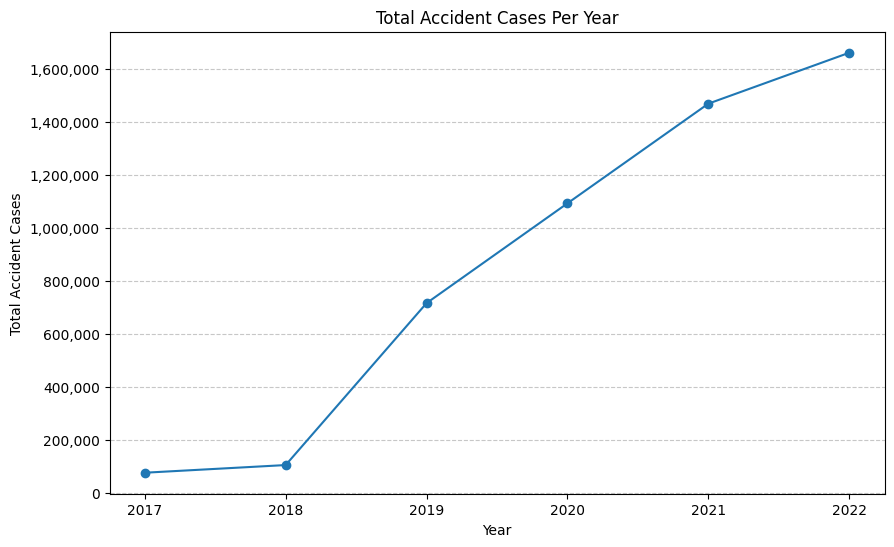

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_totals['year'], yearly_totals['accident_count'], marker='o', linestyle='-')

plt.title('Total Accident Cases Per Year')
plt.xlabel('Year')
plt.ylabel('Total Accident Cases')

plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [54]:
def plot_percentage_change(data, year_start, year_end):
    df_filtered = data[data['year'].isin([year_start, year_end])]
    
    pivoted = df_filtered.pivot(index='state', columns='year', values='accident_count').reset_index()
    pivoted.columns = ['State', f'{year_start}', f'{year_end}']
    pivoted['percent_change'] = ((pivoted[f'{year_end}'] - pivoted[f'{year_start}']) / pivoted[f'{year_start}']) * 100
    pivoted = pivoted.sort_values(by='percent_change', ascending=False)
    
    plt.figure(figsize=(12, 8))
    colors = pivoted['percent_change'].apply(lambda x: 'green' if x > 0 else 'red')
    
    plt.bar(pivoted['State'], pivoted['percent_change'], color=colors)
    
    plt.title(f'Percentage Change in Accidents ({year_start} to {year_end}) by State')
    plt.xlabel('State')
    plt.ylabel('Percentage Change (%)')
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.xticks(rotation=45)
    plt.show()

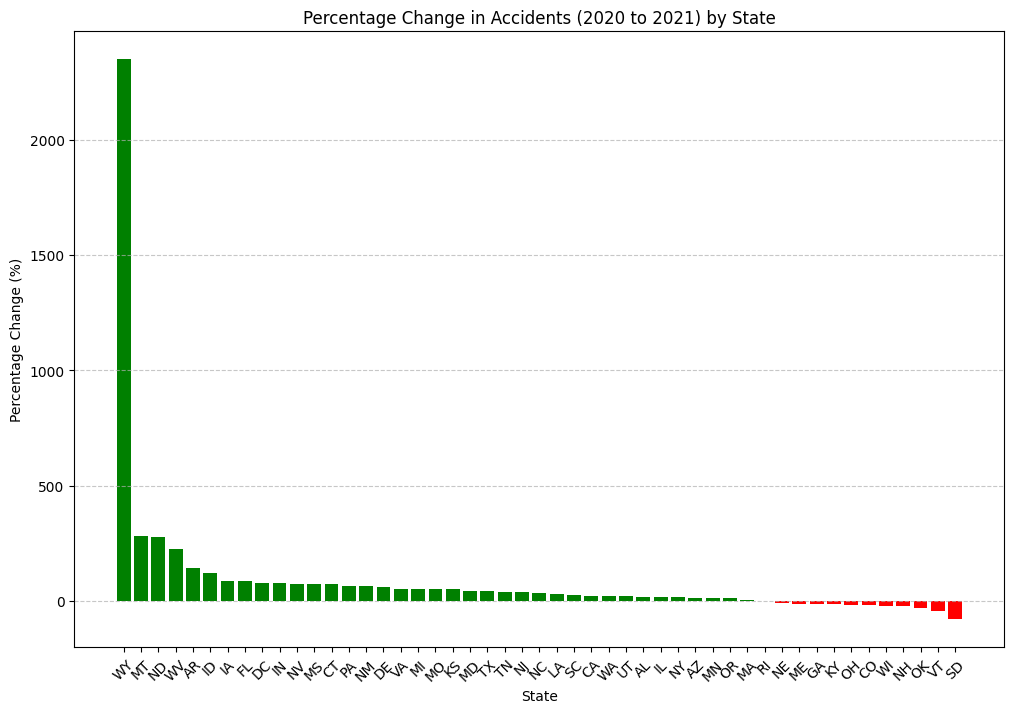

In [55]:
plot_percentage_change(yearly_counts, 2020, 2021)

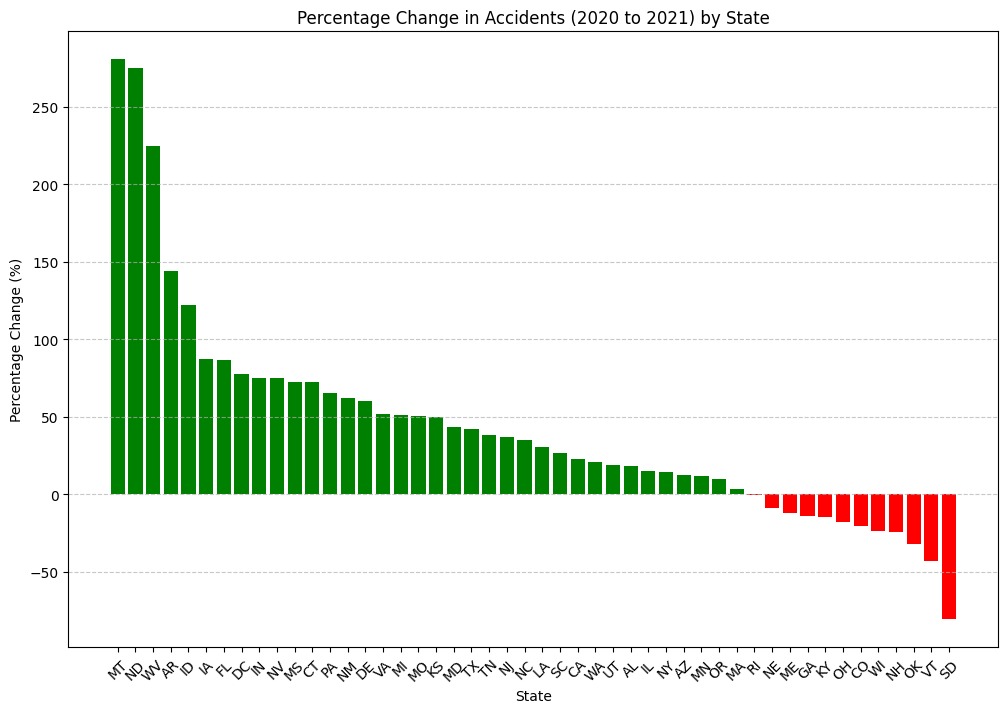

In [56]:
yearly_counts_filtered = yearly_counts[yearly_counts['state'] != 'WY']
plot_percentage_change(yearly_counts_filtered, 2020, 2021)

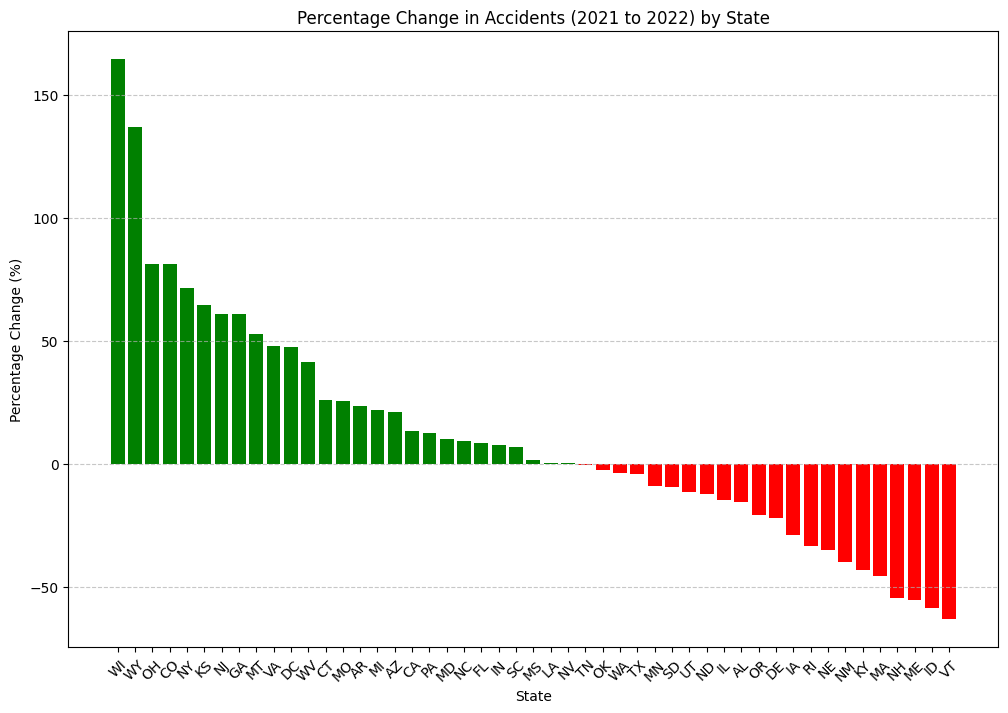

In [57]:
plot_percentage_change(yearly_counts, 2021, 2022)

### Severity Analysis

In [58]:
file_path_severity = 'results/severity_patterns_states/severity_patterns_states_analysis.csv'

In [59]:
severity_states = pd.read_csv(file_path_severity)
print(severity_states.head())

  state  total_accidents  severe_accidents  avg_severity_score  \
0    RI             9323              3959                2.41   
1    IL            99998             42142                2.43   
2    GA            94209             35454                2.44   
3    KY            20950              7718                2.39   
4    CO            57821             21186                2.43   

   severe_accident_percentage  
0                       42.46  
1                       42.14  
2                       37.63  
3                       36.84  
4                       36.64  


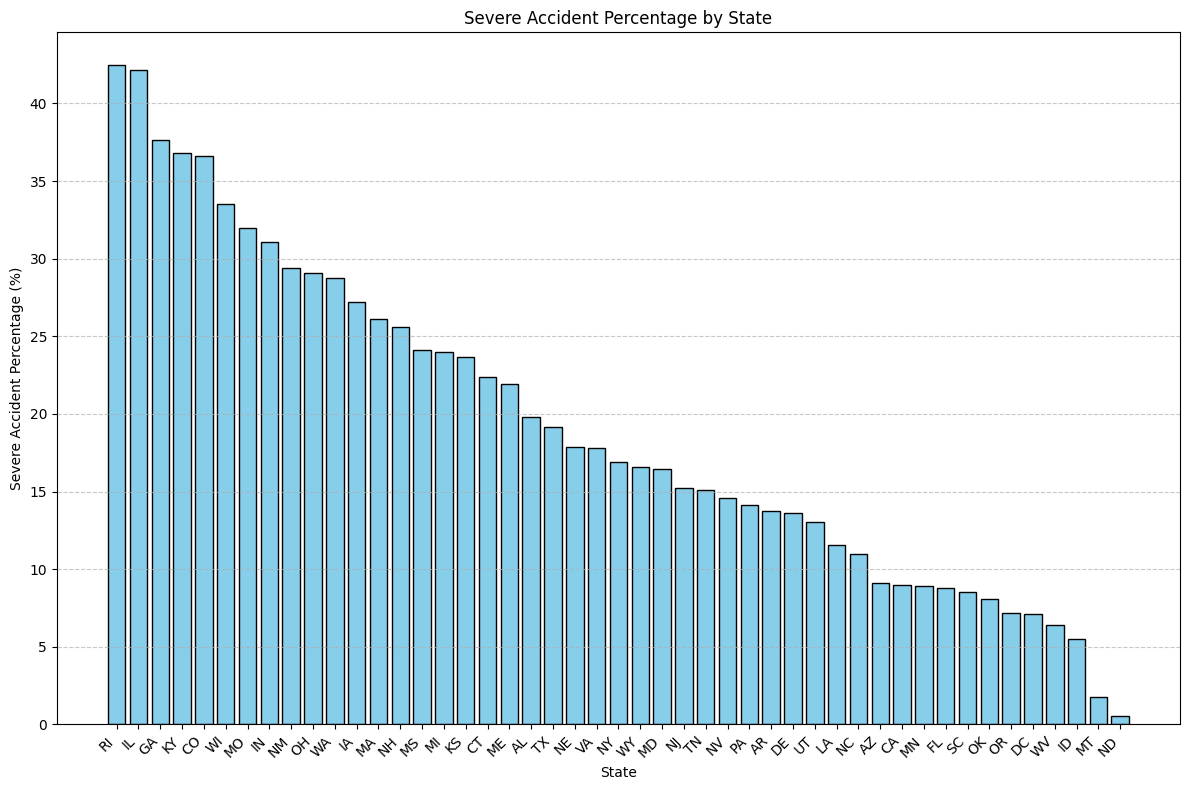

In [60]:
plt.figure(figsize=(12, 8))
bars = plt.bar(severity_states['state'], severity_states['severe_accident_percentage'], color='skyblue', edgecolor='black')

plt.title('Severe Accident Percentage by State')
plt.xlabel('State')
plt.ylabel('Severe Accident Percentage (%)')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [61]:
fig = px.choropleth(
    severity_states,
    locations='state',
    locationmode='USA-states',
    color='severe_accident_percentage',
    color_continuous_scale='Reds',
    scope='usa',
    labels={'severe_accident_percentage': 'Severe Accident (%)'},
    title='Severe Accident Percentage by State'
)

fig.update_layout(
    title_x=0.5,
    geo=dict(showframe=False, showcoastlines=False)
)
fig.show()

### Weather Analysis

In [62]:
weather_analysis_path = 'results/weather_time_analysis/weather_time_analysis.csv'
weather = pd.read_csv(weather_analysis_path)
weather.head()

,time_of_day,weather_category,accident_count,avg_severity,avg_temp,avg_visibility,avg_wind_speed,avg_precipitation
0,Morning,Clear,789410,2.12,59.65,9.78,5.33,0.0
1,Afternoon,Clear,704036,2.13,72.18,9.94,8.72,0.0
2,Morning,Cloudy,656949,2.15,59.95,9.40,7.01,0.0
3,Afternoon,Cloudy,633319,2.16,69.60,9.84,9.47,0.0
4,Evening,Clear,494895,2.14,66.60,9.91,7.06,0.0


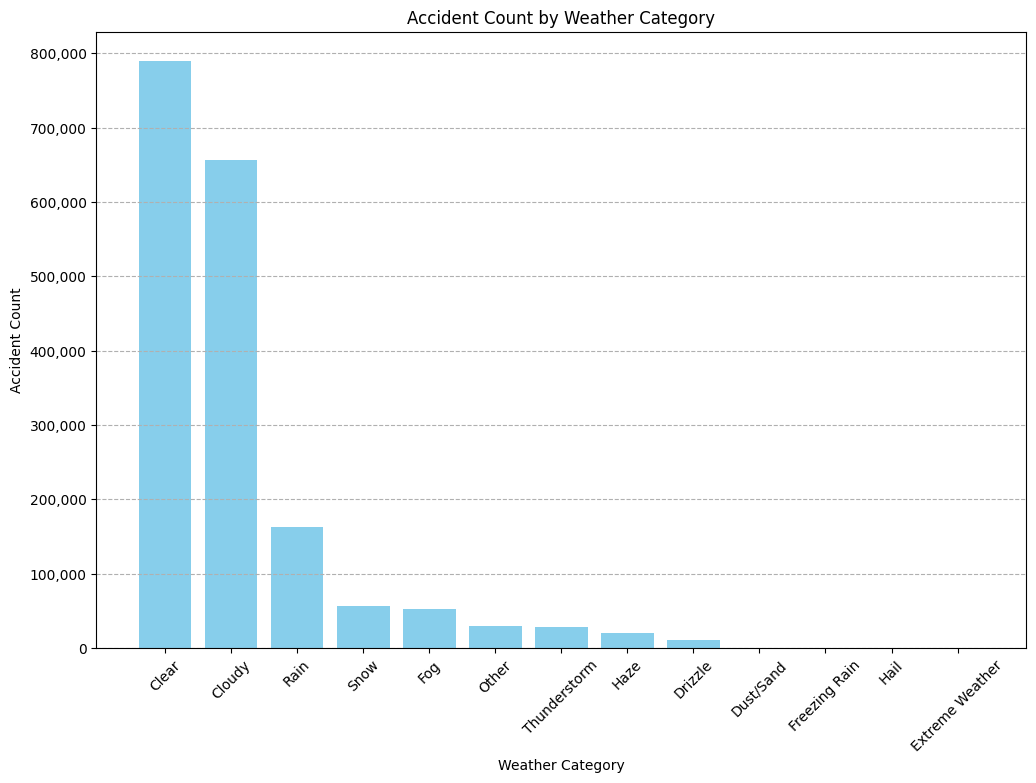

In [63]:
weather = weather.sort_values('accident_count', ascending=False)
plt.figure(figsize=(12, 8))
plt.bar(weather['weather_category'], weather['accident_count'], color='skyblue')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Weather Category')
plt.ylabel('Accident Count')
plt.title('Accident Count by Weather Category')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

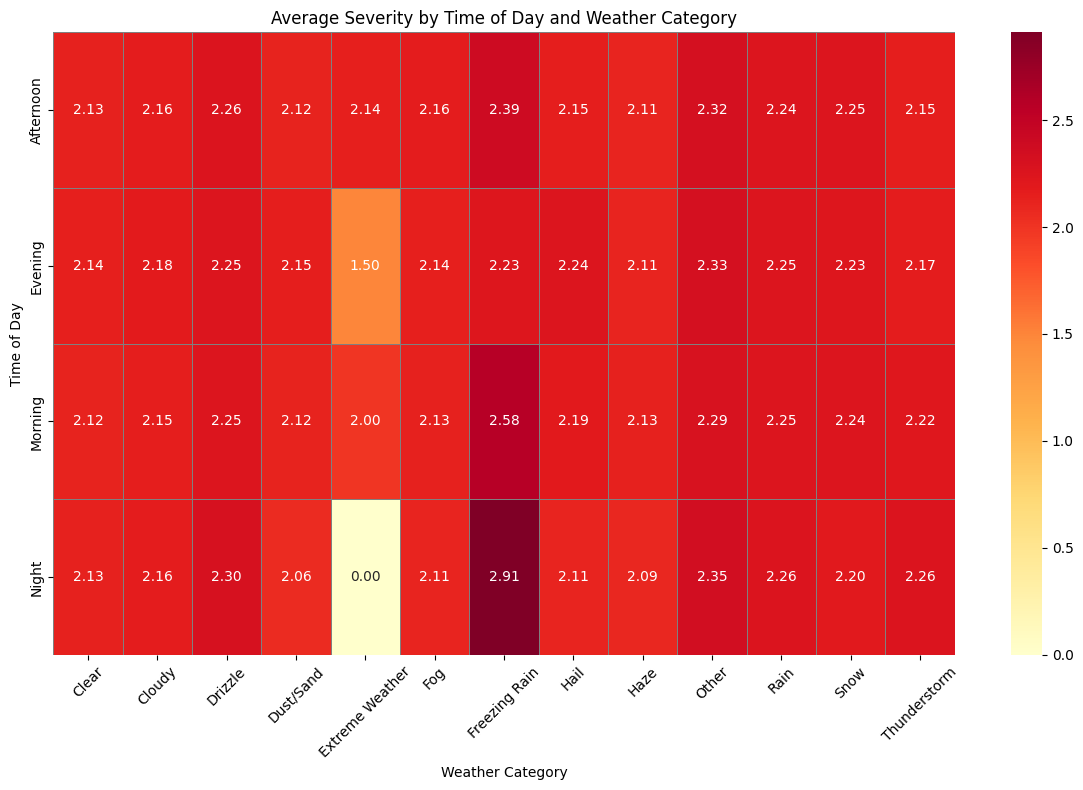

In [64]:
severity_heatmap_data = weather.pivot_table(
    index='time_of_day', 
    columns='weather_category', 
    values='avg_severity', 
    aggfunc='mean',
    fill_value=0
)

plt.figure(figsize=(12, 8))
sns.heatmap(
    severity_heatmap_data, 
    annot=True, 
    fmt='.2f',
    cmap='YlOrRd',
    linewidths=0.5, 
    linecolor='gray'
)
plt.title('Average Severity by Time of Day and Weather Category')
plt.xlabel('Weather Category')
plt.ylabel('Time of Day')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()